In [6]:
import numpy as np
import math
import random

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torch.multiprocessing as mp
from datetime import datetime

import pdb

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Utils
import data_generator
from model import VariationalLayer, VariationalNet

from train import TrainDecoupledElbo

In [2]:
is_cuda = False
dev = torch.device('cpu')  
if torch.cuda.is_available():
    is_cuda = True
    dev = torch.device('cuda')  

In [8]:
# Setting the seeds to allow replication
# Changing the seed might require hyperparameter tuning again
# Because it changes the deterministic parameters
seed_number = 0
np.random.seed(seed_number)
torch.manual_seed(seed_number)
random.seed(seed_number)

In [1]:
k_list = [ 0.001, 0.003, 0.01, 0.03, 0.1]
plv_list = [-2.0, 0.0, 2.0, 4.0, 8.0]

for k in k_list:
    for p in plv_list:
        print(f'RUNNING k:{k} and p:{p}')
        !source /home/alan/Desktop/envs/pao_env/bin/activate && python3 classic_newsvendor.py {k} {p}

RUNNING k:0.001 and p:-2.0
------------------EPOCH 1------------------
DATA LOSS 	 train 0.96 valid 0.51
KL LOSS 	 train 3.98 valid 3.64
ELBO LOSS 	 train 4.94 valid 4.15
------------------EPOCH 2------------------
DATA LOSS 	 train 0.48 valid 0.47
KL LOSS 	 train 3.43 valid 3.31
ELBO LOSS 	 train 3.91 valid 3.78
------------------EPOCH 3------------------
DATA LOSS 	 train 0.43 valid 0.39
KL LOSS 	 train 3.4 valid 3.62
ELBO LOSS 	 train 3.83 valid 4.01
------------------EPOCH 4------------------
DATA LOSS 	 train 0.35 valid 0.33
KL LOSS 	 train 3.91 valid 4.15
ELBO LOSS 	 train 4.26 valid 4.48
------------------EPOCH 5------------------
DATA LOSS 	 train 0.31 valid 0.3
KL LOSS 	 train 4.29 valid 4.37
ELBO LOSS 	 train 4.61 valid 4.67
------------------EPOCH 6------------------
DATA LOSS 	 train 0.29 valid 0.29
KL LOSS 	 train 4.41 valid 4.42
ELBO LOSS 	 train 4.7 valid 4.71
------------------EPOCH 7------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 4.38 valid 4.34
EL

DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 3.74 valid 3.77
ELBO LOSS 	 train 3.98 valid 4.01
------------------EPOCH 59------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 3.77 valid 3.78
ELBO LOSS 	 train 3.99 valid 4.02
------------------EPOCH 60------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 3.78 valid 3.81
ELBO LOSS 	 train 4.01 valid 4.05
------------------EPOCH 61------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 3.79 valid 3.82
ELBO LOSS 	 train 4.02 valid 4.05
------------------EPOCH 62------------------
DATA LOSS 	 train 0.22 valid 0.24
KL LOSS 	 train 3.79 valid 3.83
ELBO LOSS 	 train 4.02 valid 4.07
------------------EPOCH 63------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 3.8 valid 3.82
ELBO LOSS 	 train 4.02 valid 4.06
------------------EPOCH 64------------------
DATA LOSS 	 train 0.22 valid 0.24
KL LOSS 	 train 3.81 valid 3.83
ELBO LOSS 	 train 4.03 valid 4.07
------------------EPOCH 65-----

DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 1.77 valid 1.75
ELBO LOSS 	 train 2.03 valid 2.01
------------------EPOCH 16------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 1.75 valid 1.74
ELBO LOSS 	 train 2.01 valid 2.0
------------------EPOCH 17------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 1.74 valid 1.74
ELBO LOSS 	 train 2.0 valid 1.99
------------------EPOCH 18------------------
DATA LOSS 	 train 0.25 valid 0.25
KL LOSS 	 train 1.73 valid 1.72
ELBO LOSS 	 train 1.98 valid 1.97
------------------EPOCH 19------------------
DATA LOSS 	 train 0.25 valid 0.25
KL LOSS 	 train 1.72 valid 1.73
ELBO LOSS 	 train 1.97 valid 1.98
------------------EPOCH 20------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 1.72 valid 1.71
ELBO LOSS 	 train 1.96 valid 1.96
------------------EPOCH 21------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 1.71 valid 1.71
ELBO LOSS 	 train 1.95 valid 1.96
------------------EPOCH 22------

DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.24 valid 1.24
ELBO LOSS 	 train 1.45 valid 1.46
------------------EPOCH 73------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.24 valid 1.23
ELBO LOSS 	 train 1.45 valid 1.45
------------------EPOCH 74------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 1.23 valid 1.23
ELBO LOSS 	 train 1.44 valid 1.46
------------------EPOCH 75------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.23 valid 1.23
ELBO LOSS 	 train 1.44 valid 1.45
------------------EPOCH 76------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.22 valid 1.23
ELBO LOSS 	 train 1.43 valid 1.45
------------------EPOCH 77------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.22 valid 1.22
ELBO LOSS 	 train 1.43 valid 1.44
------------------EPOCH 78------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.21 valid 1.22
ELBO LOSS 	 train 1.42 valid 1.44
------------------EPOCH 79----

DATA LOSS 	 train 0.24 valid 0.26
KL LOSS 	 train 2.0 valid 1.99
ELBO LOSS 	 train 2.24 valid 2.24
------------------EPOCH 30------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 1.98 valid 1.97
ELBO LOSS 	 train 2.23 valid 2.22
------------------EPOCH 31------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 1.96 valid 1.96
ELBO LOSS 	 train 2.21 valid 2.22
------------------EPOCH 32------------------
DATA LOSS 	 train 0.24 valid 0.26
KL LOSS 	 train 1.95 valid 1.94
ELBO LOSS 	 train 2.19 valid 2.2
------------------EPOCH 33------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 1.93 valid 1.93
ELBO LOSS 	 train 2.17 valid 2.19
------------------EPOCH 34------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 1.92 valid 1.9
ELBO LOSS 	 train 2.15 valid 2.15
------------------EPOCH 35------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 1.9 valid 1.89
ELBO LOSS 	 train 2.14 valid 2.14
------------------EPOCH 36--------

DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 1.34 valid 1.33
ELBO LOSS 	 train 1.55 valid 1.56
------------------EPOCH 87------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 1.33 valid 1.32
ELBO LOSS 	 train 1.54 valid 1.55
------------------EPOCH 88------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.32 valid 1.31
ELBO LOSS 	 train 1.53 valid 1.53
------------------EPOCH 89------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 1.31 valid 1.31
ELBO LOSS 	 train 1.52 valid 1.53
------------------EPOCH 90------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 1.3 valid 1.3
ELBO LOSS 	 train 1.51 valid 1.53
------------------EPOCH 91------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.3 valid 1.29
ELBO LOSS 	 train 1.51 valid 1.52
------------------EPOCH 92------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 1.29 valid 1.28
ELBO LOSS 	 train 1.5 valid 1.51
------------------EPOCH 93--------

DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 2.3 valid 2.29
ELBO LOSS 	 train 2.52 valid 2.52
------------------EPOCH 44------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 2.29 valid 2.3
ELBO LOSS 	 train 2.51 valid 2.53
------------------EPOCH 45------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 2.28 valid 2.27
ELBO LOSS 	 train 2.5 valid 2.5
------------------EPOCH 46------------------
DATA LOSS 	 train 0.21 valid 0.24
KL LOSS 	 train 2.26 valid 2.25
ELBO LOSS 	 train 2.48 valid 2.49
------------------EPOCH 47------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 2.25 valid 2.25
ELBO LOSS 	 train 2.46 valid 2.47
------------------EPOCH 48------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 2.23 valid 2.23
ELBO LOSS 	 train 2.45 valid 2.46
------------------EPOCH 49------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 2.22 valid 2.21
ELBO LOSS 	 train 2.44 valid 2.44
------------------EPOCH 50--------

DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 1.61 valid 1.6
ELBO LOSS 	 train 1.81 valid 1.82
RUNNING k:0.001 and p:8.0
Try PLV between -3 and 6
RUNNING k:0.003 and p:-2.0
------------------EPOCH 1------------------
DATA LOSS 	 train 0.96 valid 0.51
KL LOSS 	 train 11.47 valid 10.08
ELBO LOSS 	 train 12.43 valid 10.59
------------------EPOCH 2------------------
DATA LOSS 	 train 0.48 valid 0.48
KL LOSS 	 train 9.07 valid 8.3
ELBO LOSS 	 train 9.55 valid 8.77
------------------EPOCH 3------------------
DATA LOSS 	 train 0.44 valid 0.42
KL LOSS 	 train 8.09 valid 8.22
ELBO LOSS 	 train 8.53 valid 8.63
------------------EPOCH 4------------------
DATA LOSS 	 train 0.38 valid 0.35
KL LOSS 	 train 8.64 valid 9.08
ELBO LOSS 	 train 9.02 valid 9.43
------------------EPOCH 5------------------
DATA LOSS 	 train 0.33 valid 0.31
KL LOSS 	 train 9.42 valid 9.59
ELBO LOSS 	 train 9.75 valid 9.9
------------------EPOCH 6------------------
DATA LOSS 	 train 0.3 valid 0.29
KL LOSS 	 train 9.75 val

DATA LOSS 	 train 0.26 valid 0.27
KL LOSS 	 train 5.72 valid 5.71
ELBO LOSS 	 train 5.98 valid 5.98
------------------EPOCH 58------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 5.72 valid 5.74
ELBO LOSS 	 train 5.98 valid 6.0
------------------EPOCH 59------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 5.74 valid 5.71
ELBO LOSS 	 train 6.0 valid 5.97
------------------EPOCH 60------------------
DATA LOSS 	 train 0.26 valid 0.27
KL LOSS 	 train 5.74 valid 5.73
ELBO LOSS 	 train 5.99 valid 6.0
------------------EPOCH 61------------------
DATA LOSS 	 train 0.26 valid 0.27
KL LOSS 	 train 5.73 valid 5.75
ELBO LOSS 	 train 5.99 valid 6.01
------------------EPOCH 62------------------
DATA LOSS 	 train 0.26 valid 0.27
KL LOSS 	 train 5.72 valid 5.72
ELBO LOSS 	 train 5.98 valid 5.99
------------------EPOCH 63------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 5.73 valid 5.75
ELBO LOSS 	 train 5.99 valid 6.02
------------------EPOCH 64-------

DATA LOSS 	 train 0.27 valid 0.27
KL LOSS 	 train 3.88 valid 3.85
ELBO LOSS 	 train 4.15 valid 4.11
------------------EPOCH 15------------------
DATA LOSS 	 train 0.27 valid 0.26
KL LOSS 	 train 3.81 valid 3.77
ELBO LOSS 	 train 4.08 valid 4.03
------------------EPOCH 16------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 3.74 valid 3.69
ELBO LOSS 	 train 4.0 valid 3.96
------------------EPOCH 17------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 3.68 valid 3.66
ELBO LOSS 	 train 3.94 valid 3.92
------------------EPOCH 18------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 3.62 valid 3.58
ELBO LOSS 	 train 3.88 valid 3.84
------------------EPOCH 19------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 3.57 valid 3.58
ELBO LOSS 	 train 3.84 valid 3.84
------------------EPOCH 20------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 3.53 valid 3.52
ELBO LOSS 	 train 3.79 valid 3.78
------------------EPOCH 21-----

DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 2.48 valid 2.49
ELBO LOSS 	 train 2.71 valid 2.73
------------------EPOCH 72------------------
DATA LOSS 	 train 0.22 valid 0.24
KL LOSS 	 train 2.46 valid 2.46
ELBO LOSS 	 train 2.69 valid 2.69
------------------EPOCH 73------------------
DATA LOSS 	 train 0.22 valid 0.24
KL LOSS 	 train 2.44 valid 2.43
ELBO LOSS 	 train 2.66 valid 2.67
------------------EPOCH 74------------------
DATA LOSS 	 train 0.22 valid 0.24
KL LOSS 	 train 2.43 valid 2.43
ELBO LOSS 	 train 2.65 valid 2.67
------------------EPOCH 75------------------
DATA LOSS 	 train 0.22 valid 0.24
KL LOSS 	 train 2.42 valid 2.43
ELBO LOSS 	 train 2.64 valid 2.67
------------------EPOCH 76------------------
DATA LOSS 	 train 0.23 valid 0.23
KL LOSS 	 train 2.41 valid 2.41
ELBO LOSS 	 train 2.63 valid 2.64
------------------EPOCH 77------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 2.4 valid 2.39
ELBO LOSS 	 train 2.62 valid 2.63
------------------EPOCH 78-----

DATA LOSS 	 train 0.23 valid 0.23
KL LOSS 	 train 4.64 valid 4.61
ELBO LOSS 	 train 4.87 valid 4.84
------------------EPOCH 29------------------
DATA LOSS 	 train 0.23 valid 0.23
KL LOSS 	 train 4.6 valid 4.57
ELBO LOSS 	 train 4.82 valid 4.79
------------------EPOCH 30------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 4.54 valid 4.52
ELBO LOSS 	 train 4.77 valid 4.75
------------------EPOCH 31------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 4.49 valid 4.48
ELBO LOSS 	 train 4.72 valid 4.7
------------------EPOCH 32------------------
DATA LOSS 	 train 0.22 valid 0.22
KL LOSS 	 train 4.45 valid 4.43
ELBO LOSS 	 train 4.67 valid 4.65
------------------EPOCH 33------------------
DATA LOSS 	 train 0.22 valid 0.22
KL LOSS 	 train 4.4 valid 4.4
ELBO LOSS 	 train 4.63 valid 4.63
------------------EPOCH 34------------------
DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 4.36 valid 4.32
ELBO LOSS 	 train 4.58 valid 4.54
------------------EPOCH 35--------

DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 2.85 valid 2.83
ELBO LOSS 	 train 3.06 valid 3.05
------------------EPOCH 86------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 2.84 valid 2.83
ELBO LOSS 	 train 3.05 valid 3.05
------------------EPOCH 87------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 2.83 valid 2.82
ELBO LOSS 	 train 3.05 valid 3.04
------------------EPOCH 88------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 2.83 valid 2.81
ELBO LOSS 	 train 3.04 valid 3.03
------------------EPOCH 89------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 2.81 valid 2.81
ELBO LOSS 	 train 3.03 valid 3.03
------------------EPOCH 90------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 2.81 valid 2.78
ELBO LOSS 	 train 3.02 valid 3.0
------------------EPOCH 91------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 2.79 valid 2.8
ELBO LOSS 	 train 3.0 valid 3.02
------------------EPOCH 92-------

DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.41 valid 5.39
ELBO LOSS 	 train 5.65 valid 5.64
------------------EPOCH 43------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.36 valid 5.32
ELBO LOSS 	 train 5.6 valid 5.57
------------------EPOCH 44------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.32 valid 5.33
ELBO LOSS 	 train 5.56 valid 5.58
------------------EPOCH 45------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.27 valid 5.24
ELBO LOSS 	 train 5.51 valid 5.48
------------------EPOCH 46------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.22 valid 5.18
ELBO LOSS 	 train 5.46 valid 5.43
------------------EPOCH 47------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.17 valid 5.16
ELBO LOSS 	 train 5.41 valid 5.4
------------------EPOCH 48------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.13 valid 5.12
ELBO LOSS 	 train 5.37 valid 5.37
------------------EPOCH 49------

DATA LOSS 	 train 0.22 valid 0.23
KL LOSS 	 train 3.57 valid 3.55
ELBO LOSS 	 train 3.78 valid 3.79
------------------EPOCH 100------------------
DATA LOSS 	 train 0.22 valid 0.24
KL LOSS 	 train 3.55 valid 3.52
ELBO LOSS 	 train 3.76 valid 3.75
RUNNING k:0.003 and p:8.0
Try PLV between -3 and 6
RUNNING k:0.01 and p:-2.0
------------------EPOCH 1------------------
DATA LOSS 	 train 0.96 valid 0.51
KL LOSS 	 train 35.74 valid 29.26
ELBO LOSS 	 train 36.7 valid 29.78
------------------EPOCH 2------------------
DATA LOSS 	 train 0.49 valid 0.48
KL LOSS 	 train 24.64 valid 20.93
ELBO LOSS 	 train 25.13 valid 21.41
------------------EPOCH 3------------------
DATA LOSS 	 train 0.46 valid 0.44
KL LOSS 	 train 18.99 valid 18.07
ELBO LOSS 	 train 19.45 valid 18.51
------------------EPOCH 4------------------
DATA LOSS 	 train 0.41 valid 0.39
KL LOSS 	 train 18.27 valid 18.6
ELBO LOSS 	 train 18.68 valid 18.99
------------------EPOCH 5------------------
DATA LOSS 	 train 0.37 valid 0.34
KL LOSS 	

DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 13.52 valid 13.46
ELBO LOSS 	 train 13.79 valid 13.74
------------------EPOCH 55------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 13.54 valid 13.5
ELBO LOSS 	 train 13.81 valid 13.78
------------------EPOCH 56------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 13.52 valid 13.57
ELBO LOSS 	 train 13.79 valid 13.85
------------------EPOCH 57------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 13.55 valid 13.59
ELBO LOSS 	 train 13.82 valid 13.87
------------------EPOCH 58------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 13.55 valid 13.68
ELBO LOSS 	 train 13.82 valid 13.95
------------------EPOCH 59------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 13.58 valid 13.58
ELBO LOSS 	 train 13.85 valid 13.85
------------------EPOCH 60------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 13.61 valid 13.59
ELBO LOSS 	 train 13.88 valid 13.87
---

DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 10.11 valid 9.9
ELBO LOSS 	 train 10.39 valid 10.18
------------------EPOCH 10------------------
DATA LOSS 	 train 0.27 valid 0.27
KL LOSS 	 train 9.7 valid 9.53
ELBO LOSS 	 train 9.98 valid 9.8
------------------EPOCH 11------------------
DATA LOSS 	 train 0.28 valid 0.27
KL LOSS 	 train 9.3 valid 9.14
ELBO LOSS 	 train 9.58 valid 9.41
------------------EPOCH 12------------------
DATA LOSS 	 train 0.27 valid 0.29
KL LOSS 	 train 8.98 valid 8.87
ELBO LOSS 	 train 9.25 valid 9.15
------------------EPOCH 13------------------
DATA LOSS 	 train 0.27 valid 0.27
KL LOSS 	 train 8.72 valid 8.57
ELBO LOSS 	 train 8.99 valid 8.85
------------------EPOCH 14------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 8.46 valid 8.36
ELBO LOSS 	 train 8.73 valid 8.63
------------------EPOCH 15------------------
DATA LOSS 	 train 0.27 valid 0.27
KL LOSS 	 train 8.25 valid 8.15
ELBO LOSS 	 train 8.52 valid 8.42
------------------EPOCH 16-----

DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 5.6 valid 5.62
ELBO LOSS 	 train 5.83 valid 5.86
------------------EPOCH 67------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 5.57 valid 5.58
ELBO LOSS 	 train 5.8 valid 5.82
------------------EPOCH 68------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 5.53 valid 5.57
ELBO LOSS 	 train 5.76 valid 5.81
------------------EPOCH 69------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 5.5 valid 5.48
ELBO LOSS 	 train 5.73 valid 5.72
------------------EPOCH 70------------------
DATA LOSS 	 train 0.24 valid 0.24
KL LOSS 	 train 5.47 valid 5.5
ELBO LOSS 	 train 5.7 valid 5.75
------------------EPOCH 71------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 5.45 valid 5.51
ELBO LOSS 	 train 5.69 valid 5.76
------------------EPOCH 72------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 5.41 valid 5.4
ELBO LOSS 	 train 5.65 valid 5.64
------------------EPOCH 73----------

DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 11.61 valid 11.59
ELBO LOSS 	 train 11.87 valid 11.85
------------------EPOCH 24------------------
DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 11.44 valid 11.38
ELBO LOSS 	 train 11.69 valid 11.64
------------------EPOCH 25------------------
DATA LOSS 	 train 0.25 valid 0.27
KL LOSS 	 train 11.27 valid 11.07
ELBO LOSS 	 train 11.52 valid 11.34
------------------EPOCH 26------------------
DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 11.13 valid 10.99
ELBO LOSS 	 train 11.38 valid 11.24
------------------EPOCH 27------------------
DATA LOSS 	 train 0.25 valid 0.25
KL LOSS 	 train 10.97 valid 10.88
ELBO LOSS 	 train 11.21 valid 11.13
------------------EPOCH 28------------------
DATA LOSS 	 train 0.25 valid 0.25
KL LOSS 	 train 10.83 valid 10.74
ELBO LOSS 	 train 11.08 valid 11.0
------------------EPOCH 29------------------
DATA LOSS 	 train 0.25 valid 0.25
KL LOSS 	 train 10.71 valid 10.66
ELBO LOSS 	 train 10.96 valid 10.91
---

DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 6.61 valid 6.54
ELBO LOSS 	 train 6.82 valid 6.76
------------------EPOCH 81------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 6.58 valid 6.61
ELBO LOSS 	 train 6.79 valid 6.83
------------------EPOCH 82------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 6.54 valid 6.53
ELBO LOSS 	 train 6.74 valid 6.76
------------------EPOCH 83------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 6.5 valid 6.44
ELBO LOSS 	 train 6.72 valid 6.67
------------------EPOCH 84------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 6.46 valid 6.43
ELBO LOSS 	 train 6.67 valid 6.66
------------------EPOCH 85------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 6.43 valid 6.4
ELBO LOSS 	 train 6.64 valid 6.62
------------------EPOCH 86------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 6.42 valid 6.42
ELBO LOSS 	 train 6.63 valid 6.65
------------------EPOCH 87------

DATA LOSS 	 train 0.23 valid 0.25
KL LOSS 	 train 13.28 valid 13.18
ELBO LOSS 	 train 13.51 valid 13.43
------------------EPOCH 37------------------
DATA LOSS 	 train 0.24 valid 0.24
KL LOSS 	 train 13.14 valid 13.13
ELBO LOSS 	 train 13.37 valid 13.37
------------------EPOCH 38------------------
DATA LOSS 	 train 0.23 valid 0.25
KL LOSS 	 train 12.98 valid 12.95
ELBO LOSS 	 train 13.21 valid 13.19
------------------EPOCH 39------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 12.82 valid 12.82
ELBO LOSS 	 train 13.05 valid 13.06
------------------EPOCH 40------------------
DATA LOSS 	 train 0.23 valid 0.26
KL LOSS 	 train 12.68 valid 12.69
ELBO LOSS 	 train 12.91 valid 12.94
------------------EPOCH 41------------------
DATA LOSS 	 train 0.23 valid 0.25
KL LOSS 	 train 12.52 valid 12.48
ELBO LOSS 	 train 12.75 valid 12.73
------------------EPOCH 42------------------
DATA LOSS 	 train 0.23 valid 0.24
KL LOSS 	 train 12.38 valid 12.33
ELBO LOSS 	 train 12.61 valid 12.57
--

DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 7.93 valid 7.88
ELBO LOSS 	 train 8.14 valid 8.11
------------------EPOCH 93------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 7.87 valid 7.89
ELBO LOSS 	 train 8.08 valid 8.12
------------------EPOCH 94------------------
DATA LOSS 	 train 0.21 valid 0.24
KL LOSS 	 train 7.82 valid 7.77
ELBO LOSS 	 train 8.03 valid 8.01
------------------EPOCH 95------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 7.78 valid 7.76
ELBO LOSS 	 train 7.98 valid 7.98
------------------EPOCH 96------------------
DATA LOSS 	 train 0.21 valid 0.23
KL LOSS 	 train 7.73 valid 7.74
ELBO LOSS 	 train 7.94 valid 7.97
------------------EPOCH 97------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 7.7 valid 7.71
ELBO LOSS 	 train 7.91 valid 7.93
------------------EPOCH 98------------------
DATA LOSS 	 train 0.21 valid 0.22
KL LOSS 	 train 7.63 valid 7.54
ELBO LOSS 	 train 7.84 valid 7.76
------------------EPOCH 99-----

DATA LOSS 	 train 0.3 valid 0.32
KL LOSS 	 train 30.77 valid 30.76
ELBO LOSS 	 train 31.07 valid 31.08
------------------EPOCH 48------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 30.83 valid 30.5
ELBO LOSS 	 train 31.13 valid 30.81
------------------EPOCH 49------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 30.86 valid 30.85
ELBO LOSS 	 train 31.16 valid 31.16
------------------EPOCH 50------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 30.94 valid 30.76
ELBO LOSS 	 train 31.24 valid 31.06
------------------EPOCH 51------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 30.87 valid 30.98
ELBO LOSS 	 train 31.17 valid 31.29
------------------EPOCH 52------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 30.88 valid 30.85
ELBO LOSS 	 train 31.18 valid 31.16
------------------EPOCH 53------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 30.91 valid 30.71
ELBO LOSS 	 train 31.21 valid 31.02
----------

DATA LOSS 	 train 0.42 valid 0.38
KL LOSS 	 train 61.17 valid 50.67
ELBO LOSS 	 train 61.59 valid 51.05
------------------EPOCH 4------------------
DATA LOSS 	 train 0.36 valid 0.34
KL LOSS 	 train 42.45 valid 35.45
ELBO LOSS 	 train 42.8 valid 35.8
------------------EPOCH 5------------------
DATA LOSS 	 train 0.32 valid 0.3
KL LOSS 	 train 31.03 valid 27.53
ELBO LOSS 	 train 31.35 valid 27.83
------------------EPOCH 6------------------
DATA LOSS 	 train 0.3 valid 0.3
KL LOSS 	 train 25.57 valid 24.06
ELBO LOSS 	 train 25.88 valid 24.36
------------------EPOCH 7------------------
DATA LOSS 	 train 0.3 valid 0.3
KL LOSS 	 train 23.05 valid 22.07
ELBO LOSS 	 train 23.34 valid 22.37
------------------EPOCH 8------------------
DATA LOSS 	 train 0.29 valid 0.29
KL LOSS 	 train 21.45 valid 20.77
ELBO LOSS 	 train 21.74 valid 21.05
------------------EPOCH 9------------------
DATA LOSS 	 train 0.29 valid 0.3
KL LOSS 	 train 20.19 valid 19.65
ELBO LOSS 	 train 20.47 valid 19.95
----------------

DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 9.88 valid 9.94
ELBO LOSS 	 train 10.13 valid 10.2
------------------EPOCH 60------------------
DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 9.92 valid 9.98
ELBO LOSS 	 train 10.17 valid 10.24
------------------EPOCH 61------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 9.93 valid 10.01
ELBO LOSS 	 train 10.19 valid 10.28
------------------EPOCH 62------------------
DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 9.87 valid 9.95
ELBO LOSS 	 train 10.13 valid 10.2
------------------EPOCH 63------------------
DATA LOSS 	 train 0.26 valid 0.26
KL LOSS 	 train 9.89 valid 10.06
ELBO LOSS 	 train 10.14 valid 10.33
------------------EPOCH 64------------------
DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 9.93 valid 9.91
ELBO LOSS 	 train 10.18 valid 10.17
------------------EPOCH 65------------------
DATA LOSS 	 train 0.25 valid 0.26
KL LOSS 	 train 9.93 valid 9.89
ELBO LOSS 	 train 10.18 valid 10.14
----------------

DATA LOSS 	 train 0.29 valid 0.28
KL LOSS 	 train 27.58 valid 27.05
ELBO LOSS 	 train 27.86 valid 27.32
------------------EPOCH 16------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 26.66 valid 26.28
ELBO LOSS 	 train 26.94 valid 26.56
------------------EPOCH 17------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 25.86 valid 25.58
ELBO LOSS 	 train 26.14 valid 25.86
------------------EPOCH 18------------------
DATA LOSS 	 train 0.28 valid 0.29
KL LOSS 	 train 25.03 valid 24.57
ELBO LOSS 	 train 25.31 valid 24.86
------------------EPOCH 19------------------
DATA LOSS 	 train 0.28 valid 0.29
KL LOSS 	 train 24.38 valid 24.22
ELBO LOSS 	 train 24.66 valid 24.51
------------------EPOCH 20------------------
DATA LOSS 	 train 0.28 valid 0.3
KL LOSS 	 train 23.82 valid 23.62
ELBO LOSS 	 train 24.1 valid 23.91
------------------EPOCH 21------------------
DATA LOSS 	 train 0.29 valid 0.29
KL LOSS 	 train 23.29 valid 22.96
ELBO LOSS 	 train 23.58 valid 23.25
----

DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 12.64 valid 12.68
ELBO LOSS 	 train 12.88 valid 12.94
------------------EPOCH 72------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 12.57 valid 12.51
ELBO LOSS 	 train 12.81 valid 12.76
------------------EPOCH 73------------------
DATA LOSS 	 train 0.24 valid 0.26
KL LOSS 	 train 12.49 valid 12.36
ELBO LOSS 	 train 12.73 valid 12.62
------------------EPOCH 74------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 12.39 valid 12.4
ELBO LOSS 	 train 12.63 valid 12.65
------------------EPOCH 75------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 12.32 valid 12.29
ELBO LOSS 	 train 12.56 valid 12.54
------------------EPOCH 76------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 12.27 valid 12.27
ELBO LOSS 	 train 12.51 valid 12.52
------------------EPOCH 77------------------
DATA LOSS 	 train 0.23 valid 0.25
KL LOSS 	 train 12.2 valid 12.12
ELBO LOSS 	 train 12.44 valid 12.37
----

DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 30.2 valid 29.8
ELBO LOSS 	 train 30.48 valid 30.08
------------------EPOCH 27------------------
DATA LOSS 	 train 0.27 valid 0.3
KL LOSS 	 train 29.54 valid 29.13
ELBO LOSS 	 train 29.82 valid 29.42
------------------EPOCH 28------------------
DATA LOSS 	 train 0.28 valid 0.29
KL LOSS 	 train 28.93 valid 28.63
ELBO LOSS 	 train 29.21 valid 28.92
------------------EPOCH 29------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 28.41 valid 28.12
ELBO LOSS 	 train 28.68 valid 28.39
------------------EPOCH 30------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 27.77 valid 27.43
ELBO LOSS 	 train 28.03 valid 27.71
------------------EPOCH 31------------------
DATA LOSS 	 train 0.27 valid 0.27
KL LOSS 	 train 27.16 valid 26.96
ELBO LOSS 	 train 27.43 valid 27.23
------------------EPOCH 32------------------
DATA LOSS 	 train 0.27 valid 0.27
KL LOSS 	 train 26.6 valid 26.46
ELBO LOSS 	 train 26.87 valid 26.73
------

DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 15.58 valid 15.51
ELBO LOSS 	 train 15.81 valid 15.77
------------------EPOCH 83------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 15.46 valid 15.28
ELBO LOSS 	 train 15.7 valid 15.53
------------------EPOCH 84------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 15.32 valid 15.27
ELBO LOSS 	 train 15.56 valid 15.52
------------------EPOCH 85------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 15.23 valid 15.16
ELBO LOSS 	 train 15.46 valid 15.41
------------------EPOCH 86------------------
DATA LOSS 	 train 0.23 valid 0.25
KL LOSS 	 train 15.12 valid 15.03
ELBO LOSS 	 train 15.36 valid 15.28
------------------EPOCH 87------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 15.02 valid 14.98
ELBO LOSS 	 train 15.26 valid 15.23
------------------EPOCH 88------------------
DATA LOSS 	 train 0.24 valid 0.25
KL LOSS 	 train 14.96 valid 14.82
ELBO LOSS 	 train 15.2 valid 15.07
----

DATA LOSS 	 train 0.51 valid 0.54
KL LOSS 	 train 50.39 valid 50.19
ELBO LOSS 	 train 50.9 valid 50.73
------------------EPOCH 38------------------
DATA LOSS 	 train 0.51 valid 0.53
KL LOSS 	 train 50.37 valid 49.78
ELBO LOSS 	 train 50.88 valid 50.31
------------------EPOCH 39------------------
DATA LOSS 	 train 0.51 valid 0.53
KL LOSS 	 train 50.18 valid 50.43
ELBO LOSS 	 train 50.69 valid 50.96
------------------EPOCH 40------------------
DATA LOSS 	 train 0.51 valid 0.53
KL LOSS 	 train 50.36 valid 50.51
ELBO LOSS 	 train 50.87 valid 51.04
------------------EPOCH 41------------------
DATA LOSS 	 train 0.51 valid 0.53
KL LOSS 	 train 50.37 valid 49.65
ELBO LOSS 	 train 50.88 valid 50.18
------------------EPOCH 42------------------
DATA LOSS 	 train 0.5 valid 0.53
KL LOSS 	 train 50.3 valid 51.19
ELBO LOSS 	 train 50.81 valid 51.72
------------------EPOCH 43------------------
DATA LOSS 	 train 0.51 valid 0.54
KL LOSS 	 train 50.2 valid 49.92
ELBO LOSS 	 train 50.71 valid 50.46
------

DATA LOSS 	 train 0.51 valid 0.53
KL LOSS 	 train 49.98 valid 51.01
ELBO LOSS 	 train 50.49 valid 51.54
------------------EPOCH 94------------------
DATA LOSS 	 train 0.5 valid 0.53
KL LOSS 	 train 49.98 valid 49.82
ELBO LOSS 	 train 50.49 valid 50.36
------------------EPOCH 95------------------
DATA LOSS 	 train 0.5 valid 0.54
KL LOSS 	 train 49.97 valid 49.78
ELBO LOSS 	 train 50.48 valid 50.33
------------------EPOCH 96------------------
DATA LOSS 	 train 0.51 valid 0.53
KL LOSS 	 train 49.9 valid 49.92
ELBO LOSS 	 train 50.4 valid 50.46
------------------EPOCH 97------------------
DATA LOSS 	 train 0.51 valid 0.53
KL LOSS 	 train 49.94 valid 49.59
ELBO LOSS 	 train 50.45 valid 50.12
------------------EPOCH 98------------------
DATA LOSS 	 train 0.5 valid 0.53
KL LOSS 	 train 50.05 valid 49.6
ELBO LOSS 	 train 50.55 valid 50.14
------------------EPOCH 99------------------
DATA LOSS 	 train 0.5 valid 0.53
KL LOSS 	 train 50.07 valid 50.43
ELBO LOSS 	 train 50.57 valid 50.96
---------

DATA LOSS 	 train 0.28 valid 0.29
KL LOSS 	 train 19.63 valid 19.27
ELBO LOSS 	 train 19.91 valid 19.55
------------------EPOCH 50------------------
DATA LOSS 	 train 0.28 valid 0.29
KL LOSS 	 train 19.41 valid 19.54
ELBO LOSS 	 train 19.69 valid 19.83
------------------EPOCH 51------------------
DATA LOSS 	 train 0.29 valid 0.29
KL LOSS 	 train 19.39 valid 19.49
ELBO LOSS 	 train 19.68 valid 19.78
------------------EPOCH 52------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 19.41 valid 19.41
ELBO LOSS 	 train 19.68 valid 19.69
------------------EPOCH 53------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 19.21 valid 19.29
ELBO LOSS 	 train 19.48 valid 19.57
------------------EPOCH 54------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 19.18 valid 18.94
ELBO LOSS 	 train 19.45 valid 19.22
------------------EPOCH 55------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 19.1 valid 19.52
ELBO LOSS 	 train 19.37 valid 19.8
----

DATA LOSS 	 train 0.37 valid 0.37
KL LOSS 	 train 224.38 valid 190.39
ELBO LOSS 	 train 224.76 valid 190.77
------------------EPOCH 5------------------
DATA LOSS 	 train 0.35 valid 0.33
KL LOSS 	 train 164.4 valid 141.05
ELBO LOSS 	 train 164.75 valid 141.38
------------------EPOCH 6------------------
DATA LOSS 	 train 0.33 valid 0.34
KL LOSS 	 train 124.44 valid 110.16
ELBO LOSS 	 train 124.77 valid 110.5
------------------EPOCH 7------------------
DATA LOSS 	 train 0.33 valid 0.32
KL LOSS 	 train 100.26 valid 91.8
ELBO LOSS 	 train 100.59 valid 92.12
------------------EPOCH 8------------------
DATA LOSS 	 train 0.32 valid 0.31
KL LOSS 	 train 85.65 valid 80.17
ELBO LOSS 	 train 85.97 valid 80.49
------------------EPOCH 9------------------
DATA LOSS 	 train 0.31 valid 0.34
KL LOSS 	 train 75.75 valid 71.61
ELBO LOSS 	 train 76.06 valid 71.95
------------------EPOCH 10------------------
DATA LOSS 	 train 0.32 valid 0.32
KL LOSS 	 train 69.12 valid 66.75
ELBO LOSS 	 train 69.44 valid 67

DATA LOSS 	 train 0.28 valid 0.29
KL LOSS 	 train 24.14 valid 23.93
ELBO LOSS 	 train 24.42 valid 24.23
------------------EPOCH 61------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 23.84 valid 23.99
ELBO LOSS 	 train 24.11 valid 24.27
------------------EPOCH 62------------------
DATA LOSS 	 train 0.28 valid 0.29
KL LOSS 	 train 23.7 valid 23.83
ELBO LOSS 	 train 23.98 valid 24.12
------------------EPOCH 63------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 23.61 valid 23.48
ELBO LOSS 	 train 23.88 valid 23.76
------------------EPOCH 64------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 23.41 valid 23.37
ELBO LOSS 	 train 23.68 valid 23.66
------------------EPOCH 65------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 23.19 valid 22.95
ELBO LOSS 	 train 23.47 valid 23.23
------------------EPOCH 66------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 23.05 valid 23.2
ELBO LOSS 	 train 23.32 valid 23.48
----

DATA LOSS 	 train 0.31 valid 0.32
KL LOSS 	 train 83.41 valid 81.38
ELBO LOSS 	 train 83.73 valid 81.7
------------------EPOCH 16------------------
DATA LOSS 	 train 0.31 valid 0.31
KL LOSS 	 train 79.61 valid 77.66
ELBO LOSS 	 train 79.92 valid 77.98
------------------EPOCH 17------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 76.4 valid 75.37
ELBO LOSS 	 train 76.7 valid 75.68
------------------EPOCH 18------------------
DATA LOSS 	 train 0.29 valid 0.31
KL LOSS 	 train 73.34 valid 71.71
ELBO LOSS 	 train 73.63 valid 72.02
------------------EPOCH 19------------------
DATA LOSS 	 train 0.32 valid 0.33
KL LOSS 	 train 70.86 valid 70.48
ELBO LOSS 	 train 71.18 valid 70.81
------------------EPOCH 20------------------
DATA LOSS 	 train 0.3 valid 0.32
KL LOSS 	 train 68.72 valid 67.81
ELBO LOSS 	 train 69.02 valid 68.13
------------------EPOCH 21------------------
DATA LOSS 	 train 0.3 valid 0.31
KL LOSS 	 train 66.63 valid 65.5
ELBO LOSS 	 train 66.93 valid 65.82
---------

DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 32.94 valid 33.05
ELBO LOSS 	 train 33.22 valid 33.33
------------------EPOCH 72------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 32.86 valid 32.59
ELBO LOSS 	 train 33.13 valid 32.87
------------------EPOCH 73------------------
DATA LOSS 	 train 0.27 valid 0.3
KL LOSS 	 train 32.61 valid 32.17
ELBO LOSS 	 train 32.88 valid 32.47
------------------EPOCH 74------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 32.4 valid 32.48
ELBO LOSS 	 train 32.67 valid 32.77
------------------EPOCH 75------------------
DATA LOSS 	 train 0.28 valid 0.28
KL LOSS 	 train 32.25 valid 32.04
ELBO LOSS 	 train 32.52 valid 32.32
------------------EPOCH 76------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 32.12 valid 32.14
ELBO LOSS 	 train 32.4 valid 32.42
------------------EPOCH 77------------------
DATA LOSS 	 train 0.27 valid 0.28
KL LOSS 	 train 31.99 valid 31.76
ELBO LOSS 	 train 32.25 valid 32.04
-----

In [2]:
BATCH_SIZE_LOADER = 32 # Standard batch size

In [4]:
N = 10000
N_train = 6000

In [9]:
N_valid = N - N_train

X, y = data_generator.data_1to1(N)
X, y_perfect = data_generator.data_1to1(N, noise_level=1)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

dataset = data_generator.ArtificialDataset(X, y)

data_train, data_valid = torch.utils.data.random_split(
    dataset, [N_train, N_valid], generator=torch.manual_seed(seed_number))

training_loader = torch.utils.data.DataLoader(
    data_train, batch_size=BATCH_SIZE_LOADER,
    shuffle=False, num_workers=mp.cpu_count())

validation_loader = torch.utils.data.DataLoader(
    data_valid, batch_size=BATCH_SIZE_LOADER,
    shuffle=False, num_workers=mp.cpu_count())

input_size = X.shape[1]
output_size = y.shape[1]

In [10]:
X_val = validation_loader.dataset.dataset.X[validation_loader.dataset.indices]
y_val = validation_loader.dataset.dataset.y[validation_loader.dataset.indices]
demand_true = y_val[:,0]

In [12]:
k_list = [0.0, 0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
plv_list = [-2.0, 0.0, 2.0, 4.0]

h_opt_dict = dict()
for kk in k_list:
    for pp in plv_list:
        Kstr = str(kk).replace('.','')
        plvstr = str(pp).replace('.','')
        h_opt_dict[f'{Kstr}_{plvstr}'] = torch.load(f'./models/elbo_nv1_{Kstr}_{plvstr}.pkl')

In [13]:
def plot_regression(K, PLV):

    model = h_opt_dict[f'{K}_{PLV}']
    xt = torch.hstack(
        (X_val[:,0], 
         torch.tensor(np.arange(-1.4, -1, 1/500), dtype = torch.float32), 
         torch.tensor(np.arange(1, 1.4, 1/500), dtype = torch.float32)))

    fig, ax = plt.subplots(figsize=(8,4), dpi=120)
    ax.scatter(X_val[:,0].detach(), y_val.detach(), color='b', label='Valid. Output')
    for i in range(0, 100):
        ax.scatter(xt.detach(), 
                    model(xt.unsqueeze(1)).detach().squeeze()[0], 
                    color='r', alpha=0.01)
        ax.set_ylim([-1, 10])
    fig.suptitle(f'Regression 1D fit with Uncertainty - K = {K}, PLV = {PLV}')
    ax.set_xlabel('Input')
    ax.set_ylabel('Output')

    legend_elements = [Line2D([0], [0], color='r', lw=2, label='Pred. Output'),
                   Line2D([0], [0], marker='o', color='w', label='Valid. Output',
                          markerfacecolor='b', markersize=15)]

    ax.legend(handles=legend_elements, loc='upper right')
    fig.savefig(f'./figures/regression_{K}_{PLV}.png')
    
    
def generate_demand_pred_dist(model, M):
    Y_pred = model(X_val)
    for i in range(1,int(M/model.n_samples)):
        Y_pred = torch.vstack((Y_pred, model(X_val)))
    demand_pred_distribution = Y_pred[:,:,0]
    return demand_pred_distribution

def pair_true_pred(sd, model, M):
    idx = torch.randint(0, len(validation_loader.dataset), (1,), generator=sd)
    y_true_idx = demand_true[idx]
    demand_pred_distribution = generate_demand_pred_dist(model, M)
    y_pred_dist = demand_pred_distribution[:, idx]
    return y_true_idx, y_pred_dist

def plot_samples_pred(K, PLV, M=1000):
    fig, ax = plt.subplots(2, 2, figsize=(10,7), dpi=100)
    fig.suptitle(f'Samples - Prediction Distribution versus True label \n K={K}     StdPrior = {PLV}')
    for i in range(0, 2):
        for j in range(0, 2):
            y_true_idx, y_pred_dist = pair_true_pred(torch.manual_seed(i+5*j + seed_number), 
                                                     model, M)
            ax[i,j].set_xlim([y_true_idx-2, y_true_idx+2])
            ax[i,j].hist(y_pred_dist.detach().numpy(), bins=50, color='red',alpha=0.8, label='Pred Distr')
            ax[i,j].vlines(y_true_idx,0, ax[i,j].get_ylim()[1], color='b', label='True')
            ax[i,j].legend()
    fig.savefig(f'./figures/pred_samples_{K}_{PLV}.png')

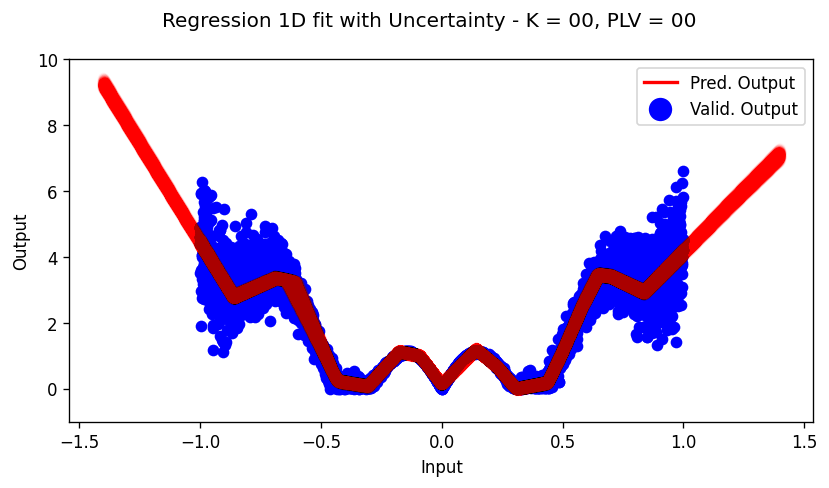

In [15]:
plot_regression(K='00', PLV='00')

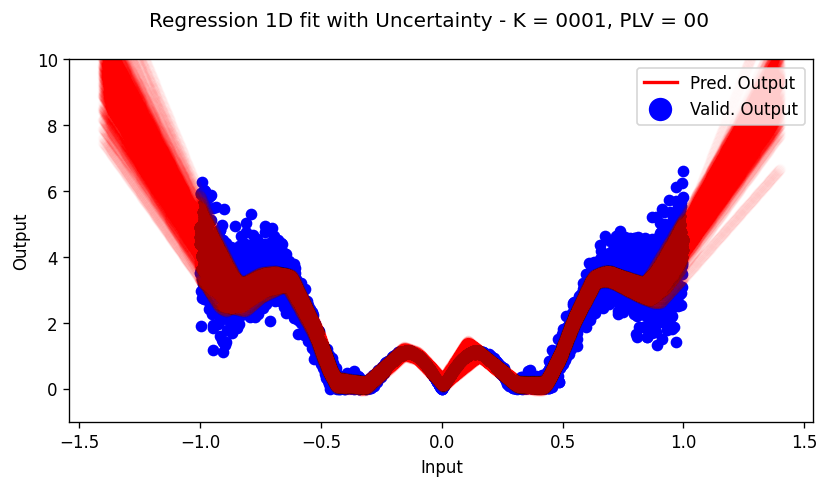

In [19]:
plot_regression(K='0001', PLV='00')

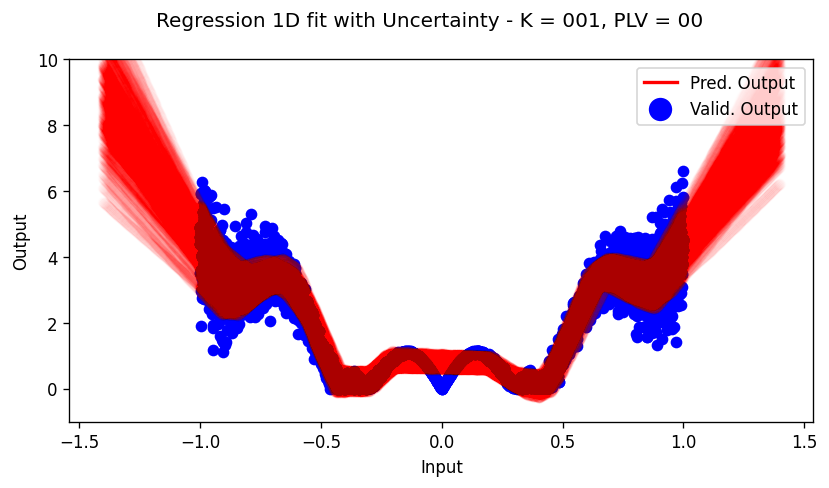

In [21]:
plot_regression(K='001', PLV='00')

In [22]:
def profit(order, sell_price, cost_price):
    return sell_price*torch.minimum(order, demand_true) - cost_price*order

def newsvendor_curve(K, PLV, M=1000):

    model = h_opt_dict[f'{K}_{PLV}']
    
    sp = 200

    zEypred_list = []
    zypred_list = []
    zy_list = []
    cp_list = list(np.arange(20,190,10))
    qtl_list = []

    for cp in cp_list:

        # Classical newsvendor problem
        sell_price = torch.tensor(sp)
        cost_price = torch.tensor(cp)
        quantile_cut = (sell_price - cost_price)/sell_price
        optimal_pred_order = torch.quantile(
            generate_demand_pred_dist(model, M), 
            quantile_cut, dim=0)
        optimal_order = demand_true

        zypred = round(profit(
            optimal_pred_order, 
            sell_price, cost_price
        ).sum().item(), 2)

        zy = round(profit(
            optimal_order, 
            sell_price, cost_price
        ).sum().item(), 2)

        qtl_list.append(quantile_cut.item())

        zypred_list.append((zy-zypred)/zy)

    return qtl_list, zypred_list

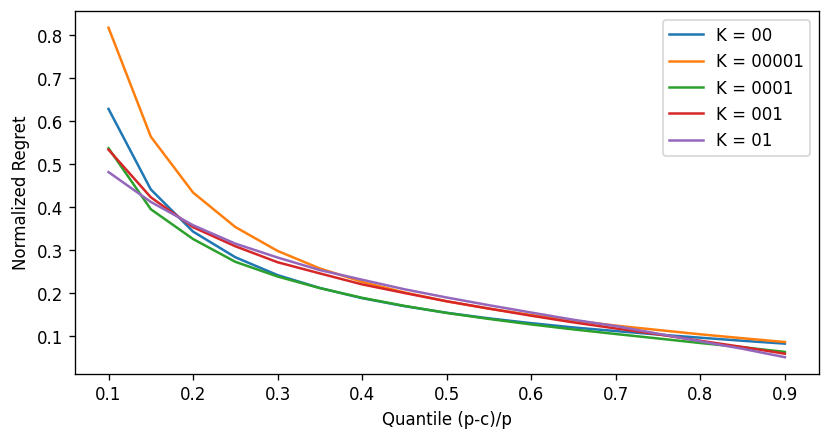

In [23]:
fig, ax = plt.subplots(figsize=(8,4), dpi=120)
ax.set_xlabel('Quantile (p-c)/p')
ax.set_ylabel('Normalized Regret')

for kk in ['00', '00001', '0001', '001', '01']:
    qtl_list, zypred_list = newsvendor_curve(K=f'{kk}', PLV='00', M=1000)
    ax.plot(qtl_list, zypred_list, label = f'K = {kk}')
    ax.legend()

In [24]:
def compute_normalized_regret(K, PLV, M=1000, sell_price = 200, cost_price = 150):

    model = h_opt_dict[f'{K}_{PLV}']

    quantile_cut = (sell_price - cost_price)/sell_price

    optimal_pred_order = torch.quantile(
                generate_demand_pred_dist(model, M), 
                quantile_cut, dim=0)

    optimal_order = demand_true

    zypred = round(profit(
                optimal_pred_order, 
                sell_price, cost_price
            ).sum().item(), 2)

    zy = round(profit(
        optimal_order, 
        sell_price, cost_price
    ).sum().item(), 2)

    normalized_regret = (zy-zypred)/zy
    
    return normalized_regret

In [30]:
sell_price = 200
cost_price = 40

nrs = np.zeros((len(k_list), len(plv_list)))

for i in range(0, len(k_list)):
    for j in range(0, len(plv_list)):
        nrs[i,j] = compute_normalized_regret(
                        str(k_list[i]).replace('.',''), 
                        str(plv_list[j]).replace('.',''), 
                        M=1000,
                        sell_price=sell_price, 
                        cost_price=cost_price)

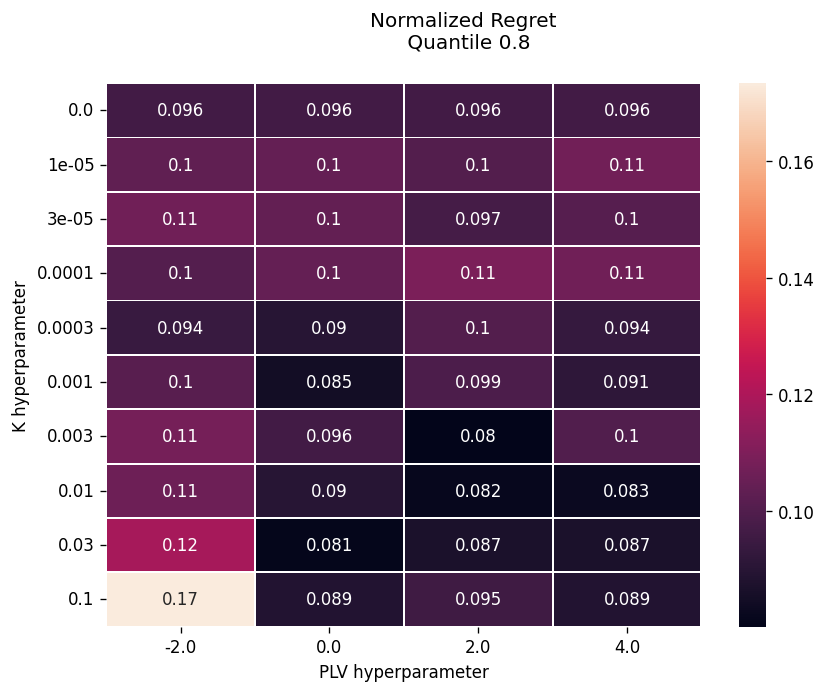

In [31]:

fig, ax = plt.subplots(figsize=(8,6),dpi=120)
ax = sns.heatmap(nrs, linewidth=0.5, xticklabels=plv_list, yticklabels=k_list, annot=True)
fig.suptitle(f'Normalized Regret \n Quantile {(sell_price - cost_price)/sell_price}')
ax.set_ylabel('K hyperparameter')
ax.set_xlabel('PLV hyperparameter')

plt.show()